I want to see whether the introduction of mandatory emissions checks on cars every two years since 1983 correlates with an increase in air quality.

According to the "State of the Air" report 2020 by the American Lung Association there is a general decreasing trend in emissions since the 1970's in the US.

According to https://www.cabq.gov/airquality/trends there is also a downward trend between 2000 - 2015 in:
1. Ozone (parts per million, ppm)
2. Carbon Monoxide (parts per million, ppm)
3. Nitrogen Dioxide (parts per billion, ppb)
concentration in Albuqurque.

Levels of Sulfur Dioxide and particulate matter (both 10 and 2.5 microns) however appear to be stable over the same time period. For reference a human hair is aproximately 70 microns wide.

In [6]:
import pandas as pd
from pathlib import Path
import plotly.express as px

In [7]:
#Change in Ozone levels (Parts per million)
level_ozone_2000 = 0.075
level_ozone_2015 = 0.066
change_ozone = round(level_ozone_2015 - level_ozone_2000, 4)

#Change in Carbon Monoxide levels (Parts per million)
level_CO_2000 = 3.8
level_CO_2015 = 1.4
change_CO = round(level_CO_2015 - level_CO_2000, 4)

#Change in Nitrogen Dioxide levels (Parts per billion)
level_NO_2000 = 65
level_NO_2015 = 45
change_NO = level_NO_2015 - level_NO_2000
#convert to ppm
change_NO = change_NO/1000

In [8]:
#Percent change Ozone
percent_ozone = round(change_ozone/level_ozone_2000 * 100, 4)
percent_CO = round(change_CO/level_CO_2000 * 100, 4)
precent_NO = round(change_NO/level_NO_2000 * 100, 4)

In [9]:
data = {"change_ppm": [change_ozone, change_CO, change_NO], "percent_change": [percent_ozone, percent_CO, precent_NO]}
df_change = pd.DataFrame(data = data, index = ["Ozone", "Carbon_Monoxide", "Nitrogen_Dioxide"])
print("Change in three air pollutants from 2000 to 2015 in Albuquerque")
df_change

Change in three air pollutants from 2000 to 2015 in Albuquerque


,change_ppm,percent_change
Ozone,-0.009,-12.0000
Carbon_Monoxide,-2.400,-63.1579
Nitrogen_Dioxide,-0.020,-0.0308


Using data from https://www.epa.gov/outdoor-air-quality-data/air-data-daily-air-quality-tracker I want to visualize the difference in emissions between the year before mandatory car emissions checks were introduced (1982) and 2020. The metric is the Air Quality Index (AQI) for Ozone.
Note: I chose not to use the combined Ozone and and PM2.5 (Particulate Matter 2.5 microns) score, as for 1982 only the Ozone value was used in the combined score.

In [ ]:
#AQI values
AQI_VALUES = {"Good":range(0, 51), "Moderate":range(51, 101), "Sensitive":range(101, 151), "Unhealthy":range(151, 201),
             "Very Unhealthy":range(201, 301), "Hazardous":range(301, 501)}
AQI_VALUES

In [10]:
DATA_1982 = Path("data/1982_aqi_data.csv")
DATA_2020 = Path("data/2020_aqi_data.csv")

In [37]:
df_1982 = pd.read_csv(DATA_1982, parse_dates=[0,8,9], skipinitialspace=True)

In [38]:
#df_1982.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        365 non-null    datetime64[ns]
 1   Ozone AQI Value             365 non-null    int64         
 2   Site Name                   56 non-null     object        
 3   Site ID                     365 non-null    object        
 4   Source                      365 non-null    object        
 5   20-year High (2000-2019)    365 non-null    int64         
 6   20-year Low (2000-2019)     365 non-null    int64         
 7   5-year Average (2015-2019)  365 non-null    float64       
 8   Date of 20-year High        365 non-null    datetime64[ns]
 9   Date of 20-year Low         365 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 28.6+ KB


In [39]:
df_2020 = pd.read_csv(DATA_2020, parse_dates=[0,8,9], skipinitialspace=True)

In [40]:
#df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        366 non-null    datetime64[ns]
 1   Ozone AQI Value             366 non-null    int64         
 2   Site Name                   275 non-null    object        
 3   Site ID                     366 non-null    object        
 4   Source                      366 non-null    object        
 5   20-year High (2000-2019)    366 non-null    int64         
 6   20-year Low (2000-2019)     366 non-null    int64         
 7   5-year Average (2015-2019)  366 non-null    object        
 8   Date of 20-year High        366 non-null    datetime64[ns]
 9   Date of 20-year Low         366 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 28.7+ KB


In [41]:
#df_2020.head()

,Date,Ozone AQI Value,Site Name,Site ID,Source,20-year High (2000-2019),20-year Low (2000-2019),5-year Average (2015-2019),Date of 20-year High,Date of 20-year Low
0,2020-01-01,42,Foothills,35-001-1012,AQS,44,27,31.8,2013-01-01,2001-01-01
1,2020-01-02,39,Foothills,35-001-1012,AQS,49,31,35.4,2007-01-02,2002-01-02
2,2020-01-03,38,Foothills,35-001-1012,AQS,43,24,37.8,2006-01-03,2005-01-03
3,2020-01-04,36,Foothills,35-001-1012,AQS,42,29,38.4,2019-01-04,2001-01-04
4,2020-01-05,36,Foothills,35-001-1012,AQS,43,24,32.8,2013-01-05,2001-01-05


In [42]:
#df_1982.head()

,Date,Ozone AQI Value,Site Name,Site ID,Source,20-year High (2000-2019),20-year Low (2000-2019),5-year Average (2015-2019),Date of 20-year High,Date of 20-year Low
0,1982-01-01,26,Foothills,35-001-1012,AQS,44,27,31.8,2013-01-01,2001-01-01
1,1982-01-02,30,Foothills,35-001-1012,AQS,49,31,35.4,2007-01-02,2002-01-02
2,1982-01-03,37,NaN,35-043-1001,AQS,43,24,37.8,2006-01-03,2005-01-03
3,1982-01-04,31,Foothills,35-001-1012,AQS,42,29,38.4,2019-01-04,2001-01-04
4,1982-01-05,28,Foothills,35-001-1012,AQS,43,24,32.8,2013-01-05,2001-01-05


In [49]:
df = pd.concat([df_1982, df_2020], ignore_index=True)

In [50]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        731 non-null    datetime64[ns]
 1   Ozone AQI Value             731 non-null    int64         
 2   Site Name                   331 non-null    object        
 3   Site ID                     731 non-null    object        
 4   Source                      731 non-null    object        
 5   20-year High (2000-2019)    731 non-null    int64         
 6   20-year Low (2000-2019)     731 non-null    int64         
 7   5-year Average (2015-2019)  731 non-null    object        
 8   Date of 20-year High        731 non-null    datetime64[ns]
 9   Date of 20-year Low         731 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 57.2+ KB


In [60]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
#df.head()

,Date,Ozone AQI Value,Site Name,Site ID,Source,20-year High (2000-2019),20-year Low (2000-2019),5-year Average (2015-2019),Date of 20-year High,Date of 20-year Low,Year
0,1982-01-01,26,Foothills,35-001-1012,AQS,44,27,31.8,2013-01-01,2001-01-01,1982
1,1982-01-02,30,Foothills,35-001-1012,AQS,49,31,35.4,2007-01-02,2002-01-02,1982
2,1982-01-03,37,NaN,35-043-1001,AQS,43,24,37.8,2006-01-03,2005-01-03,1982
3,1982-01-04,31,Foothills,35-001-1012,AQS,42,29,38.4,2019-01-04,2001-01-04,1982
4,1982-01-05,28,Foothills,35-001-1012,AQS,43,24,32.8,2013-01-05,2001-01-05,1982


In [77]:
df['month_day'] = df['Date'].dt.strftime('%m-%d')

In [74]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        731 non-null    datetime64[ns]
 1   Ozone AQI Value             731 non-null    int64         
 2   Site Name                   331 non-null    object        
 3   Site ID                     731 non-null    object        
 4   Source                      731 non-null    object        
 5   20-year High (2000-2019)    731 non-null    int64         
 6   20-year Low (2000-2019)     731 non-null    int64         
 7   5-year Average (2015-2019)  731 non-null    object        
 8   Date of 20-year High        731 non-null    datetime64[ns]
 9   Date of 20-year Low         731 non-null    datetime64[ns]
 10  Year                        731 non-null    int64         
 11  month_day                   731 non-null    object        

In [87]:
fig = px.line(df, x='month_day', y='Ozone AQI Value', color='Year', title="Ozone AQI Values")
fig.update_xaxes(type='category')
fig.show()
#find out how to set date-time format to day_month in x-axis
#find out why strange values shown below

In [84]:
#import seaborn as sns
#%matplotlib inline

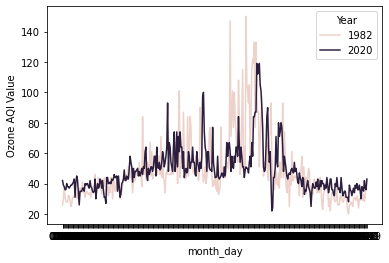

In [85]:
#fig_sns = sns.lineplot(data=df, x="month_day", y="Ozone AQI Value", hue='Year')

In [46]:
fig2 = px.line(df_2020, x="Date", y="Ozone AQI Value", title="Ozone AQI Values 2020")
fig2.show()